In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import timeit
from math import sqrt
from operator import itemgetter

class Point():
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
class Node():
    def __init__(self, x0, y0, w, h, points):
        self.x0 = x0
        self.y0 = y0
        self.width = w
        self.height = h
        self.points = points
        self.children = []

    def get_width(self):
        return self.width

    def get_height(self):
        return self.height

    def get_points(self):
        return self.points
    
class QTree():
    def __init__(self, k, n,point_list):
        self.threshold = k #defines how many points can be allowed in a single (sub)square
        self.points = [Point(point_list[j][0],point_list[j][1])for j in range(len(df))]
        self.root = Node(-180, -90, 360, 180, self.points)
        

    def add_point(self, x, y):
        self.points.append(Point(x, y))
    
    def get_points(self):
        return self.points
    
    def subdivide(self):
        recursive_subdivide(self.root, self.threshold)
    
    def plot_tree(self):
        fig = plt.figure(figsize=(60, 30)) 
        plt.title("Quadtree")
        ax = fig.add_subplot(111)
        c = find_children(self.root)
        for n in c:
            ax.add_patch(patches.Rectangle((n.x0, n.y0), n.width, n.height, fill=False))
        x = [point.x for point in self.points]
        y = [point.y for point in self.points]
        plt.plot(x, y, 'ro',markersize=2)
        plt.show()
        return
    
    def plot_knn(self,result,center):
        fig = plt.figure(figsize=(60, 30)) 
        plt.title("Quadtree")
        ax = fig.add_subplot(111)
        c = find_children(self.root)
        for n in c:
            ax.add_patch(patches.Rectangle((n.x0, n.y0), n.width, n.height, fill=False))
        x = [point.x for point in self.points]
        y = [point.y for point in self.points]
        plt.plot(x, y, 'ro',markersize=2)
        
        for i in range(len(result)):
            plt.plot(result[i][1],result[i][2] , 'go',markersize=2)
        
        plt.plot(center[0],center[1],marker='o', color='blue',markersize=5)
        
        plt.show()
        return
    
    def plot_range_search(self,result,center, k):
        fig = plt.figure(figsize=(60, 30)) 
        plt.title("Quadtree")
        ax = fig.add_subplot(111)
        c = find_children(self.root)
        radius = k
        for n in c:
            ax.add_patch(patches.Rectangle((n.x0, n.y0), n.width, n.height, fill=False))
        x = [point.x for point in self.points]
        y = [point.y for point in self.points]
        plt.plot(x, y, 'ro',markersize=2)
        
        
        for i in range(len(result)):
            plt.plot(result[i][1],result[i][2] , 'bo',markersize=2)
        plt.plot(center[0],center[1],marker='o', color='green', markersize=5)
        circle2 = plt.Circle((center[0],center[1]), radius, color='b', fill=False)
        plt.gcf().gca().add_artist(circle2)
                
        plt.show()
        return
    
    def delete(self, x, y, node=None,):
        if node is None:
            node = self.root
        if node.x0 + node.width / 2 >= x and node.y0 + node.height / 2 >= y:

            if node.points is None:

                self.delete(x, y, node.children[0])
            else:
                flag = 0
                for i in node.points:
                    if i.x == x and i.y == y:
                        flag = 1
                        node.points.remove(Point(i.x, i.y))

                        break
                if flag == 1:
                    print("The point found and deleted")
                else:
                    print("This point does not exist")

        elif node.x0 + node.width / 2 <= x and node.y0 + node.height / 2 <= y:

            if node.points is None:

                self.delete(x, y, node.children[3])
            else:
                flag = 0
                for i in node.points:
                    if i.x == x and i.y == y:
                        flag = 1
                        node.points.remove(Point(i.x, i.y))
                        break
                if flag == 1:
                    print("The point found and deleted")
                else:
                    print("This point does not exist")

        elif node.x0 + node.width / 2 >= x and + node.y0 + node.height / 2 <= y:

            if node.points is None:

                self.delete(x, y, node.children[1])
            else:
                flag = 0
                for i in node.points:
                    if i.x == x and i.y == y:
                        flag = 1
                        node.points.remove(Point(i.x, i.y))

                        break
                if flag == 1:
                    print("The point found and deleted")
                else:
                    print("This point does not exist")

        elif node.x0 + node.width / 2 <= x and node.y0 + node.height / 2 >= y:

            if node.points is None:

                self.delete(x, y, node.children[2])
            else:
                flag = 0
                for i in node.points:
                    if i.x == x and i.y == y:
                        node.points.remove(Point(i.x, i.y))
                        break
                if flag == 1:
                    print("The point found and deleted")
                else:
                    print("This point does not exist")
                    

    def search_point(self, x, y, node=None):
        if node is None:
            node = self.root
        if node.x0 + node.width / 2 >= x and node.y0 + node.height / 2 >= y:

            if node.points is None:

                self.search_point(x, y, node.children[0])
            else:
                flag = 0
                for i in node.points:
                    if i.x == x and i.y == y:
                        flag = 1
                        break
                if flag:
                    print("Point Found.")
                else:
                    print("Not in the dataset")
        elif node.x0 + node.width / 2 <= x and node.y0 + node.height / 2 <= y:

            if node.points is None:

                self.search_point(x, y, node.children[3])
            else:
                flag = 0
                for i in node.points:
                    if i.x == x and i.y == y:
                        flag = 1
                        break
                if flag:
                    print("Point Found.")
                else:
                    print("Not in the dataset")
        elif node.x0 + node.width / 2 >= x and + node.y0 + node.height / 2 <= y:

            if node.points is None:

                self.search_point(x, y, node.children[1])
            else:
                flag = 0
                for i in node.points:
                    if i.x == x and i.y == y:
                        flag = 1
                        break
                if flag:
                    print("Point Found.")
                else:
                    print("Not in the dataset")
        elif node.x0 + node.width / 2 <= x and node.y0 + node.height / 2 >= y:

            if node.points is None:

                self.search_point(x, y, node.children[2])
            else:
                flag = 0
                for i in node.points:
                    if i.x == x and i.y == y:
                        flag = 1
                        break
                if flag:
                    print("Point Found.")
                else:
                    print("Not in the dataset")
                    
    def delete2(self, x, y, node=None,): #exact same def with delete, just w/o the prints. Used for update function 
        if node is None:
            node = self.root
        if node.x0 + node.width / 2 >= x and node.y0 + node.height / 2 >= y:

            if node.points is None:

                self.delete(x, y, node.children[0])
            else:
                flag = 0
                for i in node.points:
                    if i.x == x and i.y == y:
                        flag = 1
                        node.points.remove(Point(i.x, i.y))

                        break

        elif node.x0 + node.width / 2 <= x and node.y0 + node.height / 2 <= y:

            if node.points is None:

                self.delete(x, y, node.children[3])
            else:
                flag = 0
                for i in node.points:
                    if i.x == x and i.y == y:
                        flag = 1
                        node.points.remove(Point(i.x, i.y))
                        break
                
        elif node.x0 + node.width / 2 >= x and + node.y0 + node.height / 2 <= y:

            if node.points is None:

                self.delete(x, y, node.children[1])
            else:
                flag = 0
                for i in node.points:
                    if i.x == x and i.y == y:
                        flag = 1
                        node.points.remove(Point(i.x, i.y))

                        break
               
        elif node.x0 + node.width / 2 <= x and node.y0 + node.height / 2 >= y:

            if node.points is None:

                self.delete(x, y, node.children[2])
            else:
                flag = 0
                for i in node.points:
                    if i.x == x and i.y == y:
                        node.points.remove(Point(i.x, i.y))
                        break
               
    def update(self, point, new_point):
        
        self.delete2(point[0],point[1])
        self.add_point(new_point[0],new_point[1])
        self.subdivide()
    
    def knn_search(self, x, y, k):
        dist = []
        result = []
        for i in range(len(self.root.points)):
            dx = (self.root.points[i].x - x)**2
            dy = (self.root.points[i].y - y)**2
            d = sqrt(dx + dy)
            dist.append([d,self.root.points[i].x,self.root.points[i].y])
        dist = sorted(dist,key=itemgetter(0))
        for j in range(k):
            result.append(dist[j])
        return result
    
    def range_search(self, x, y, k):
        dist = []
        for i in range(len(self.root.points)):
            dx = (self.root.points[i].x - x)**2
            dy = (self.root.points[i].y - y)**2
            d = sqrt(dx + dy)
            if(d <= k):
                dist.append([d,self.root.points[i].x,self.root.points[i].y])
        return dist
    
def recursive_subdivide(node, k):
    if len(node.points)<=k:
        return
    
    w_ = float(node.width/2)
    h_ = float(node.height/2)

    p = contains(node.x0, node.y0, w_, h_, node.points)
    x1 = Node(node.x0, node.y0, w_, h_, p)
    recursive_subdivide(x1, k)

    p = contains(node.x0, node.y0+h_, w_, h_, node.points)
    x2 = Node(node.x0, node.y0+h_, w_, h_, p)
    recursive_subdivide(x2, k)

    p = contains(node.x0+w_, node.y0, w_, h_, node.points)
    x3 = Node(node.x0 + w_, node.y0, w_, h_, p)
    recursive_subdivide(x3, k)

    p = contains(node.x0+w_, node.y0+h_, w_, h_, node.points)
    x4 = Node(node.x0+w_, node.y0+h_, w_, h_, p)
    recursive_subdivide(x4, k)

    node.children = [x1, x2, x3, x4]
    
    
def contains(x, y, w, h, points):
    pts = []
    for point in points:
        if point.x >= x and point.x <= x+w and point.y>=y and point.y<=y+h:
            pts.append(point)
    return pts


def find_children(node):
    if not node.children:
        return [node]
    else:
        children = []
        for child in node.children:
            children += (find_children(child))
    return children
    
df = pd.read_csv("airports.csv", delimiter=',', skiprows=0, low_memory=False)    

l = len(df)


point_list = [((df['lat'][j], df['lng'][j]))
           for j in range(l)]
    
start_time = timeit.default_timer()

tree = QTree(30,l,point_list)
tree.subdivide()
print("Tree created in %s seconds. " % (timeit.default_timer() - start_time))


tree.plot_tree()



Tree created in 0.2516740999999989 seconds. 


C:\Users\dimit\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<Figure size 6000x3000 with 1 Axes>

Point added in 0.13632480000000058 seconds. 


C:\Users\dimit\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


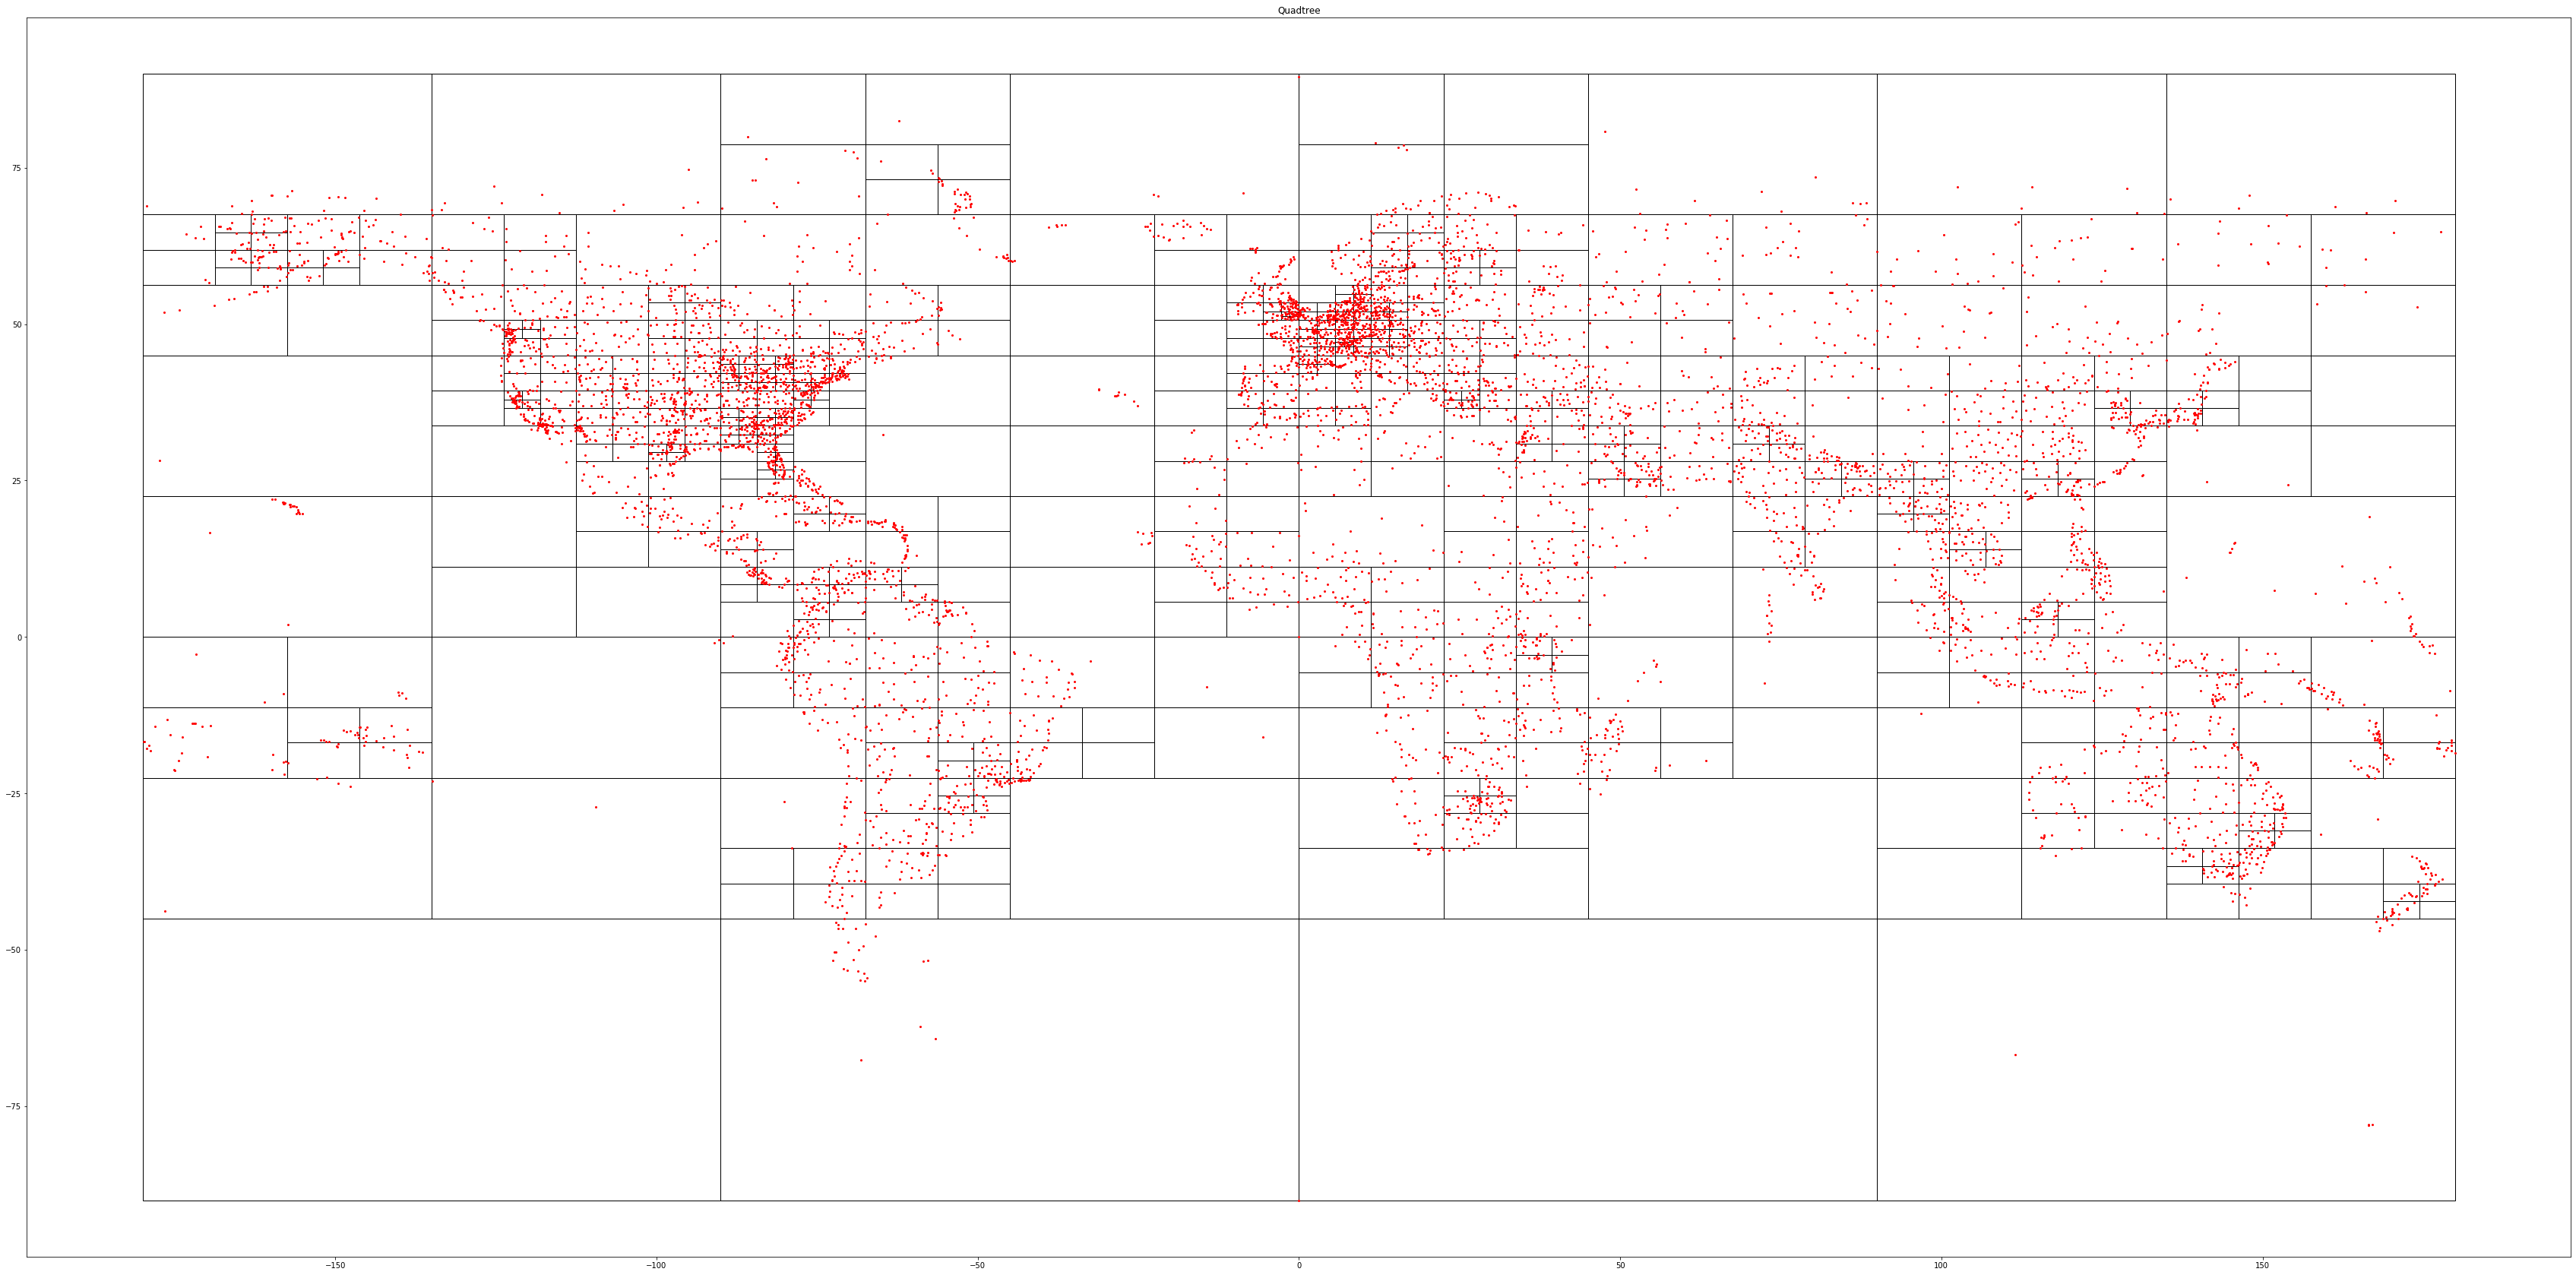

In [2]:
add_time = timeit.default_timer()

tree.add_point(-88.164854397615025,0.124379655037946)
tree.subdivide()
print("Point added in %s seconds. " % (timeit.default_timer() - add_time))

tree.plot_tree()

The point found and deleted
Point deleted in 0.14969810000000194 seconds. 


C:\Users\dimit\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


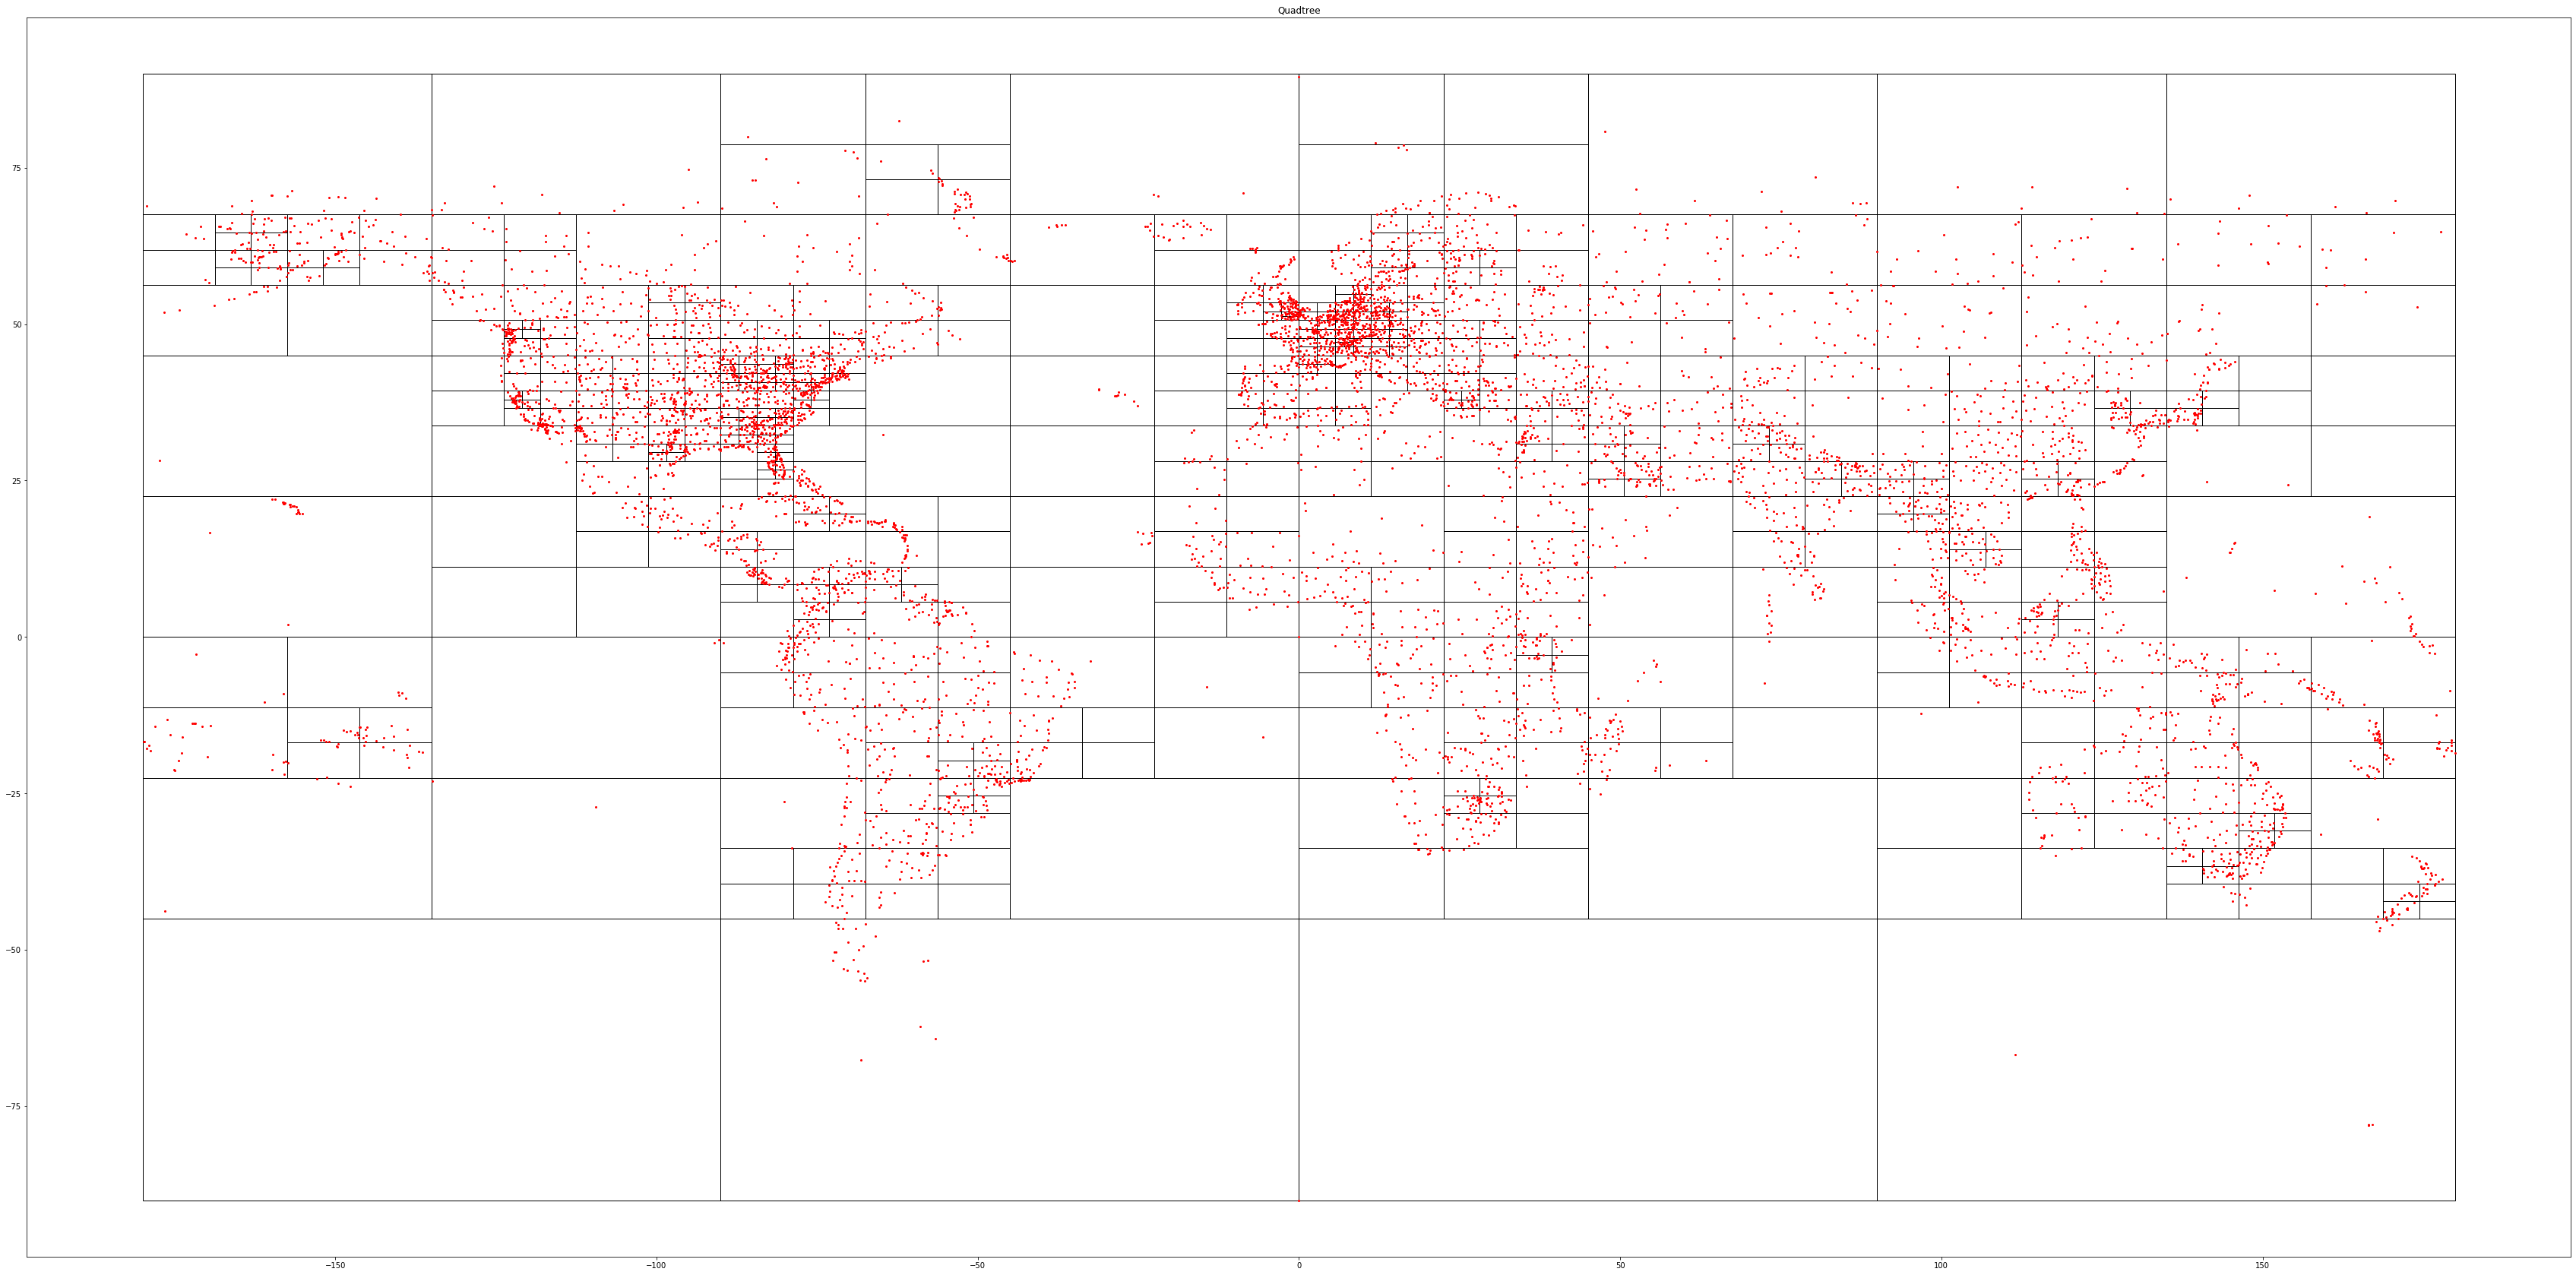

In [3]:
delete_time = timeit.default_timer()

tree.delete(-88.164854397615025,0.124379655037946 ) 
tree.subdivide()
print("Point deleted in %s seconds. " % (timeit.default_timer() - delete_time))

tree.plot_tree()

In [4]:
search_time = timeit.default_timer()
tree.search_point(-43.16583251953125,-22.95166778564453)
print("Tree successfully parsed. Point searching completed in %s seconds. " % (timeit.default_timer() - search_time))


Point Found.
Tree successfully parsed. Point searching completed in 0.0027035000000026344 seconds. 


In [5]:
search_time = timeit.default_timer()
tree.search_point(-111.148634970054849, 18.157603133951479)
print("Tree successfully parsed. Point searching completed in %s seconds. " % (timeit.default_timer() - search_time))


Not in the dataset
Tree successfully parsed. Point searching completed in 0.0032689999999995223 seconds. 


Nearest neighbors found in 0.05308949999999868 seconds. 


C:\Users\dimit\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


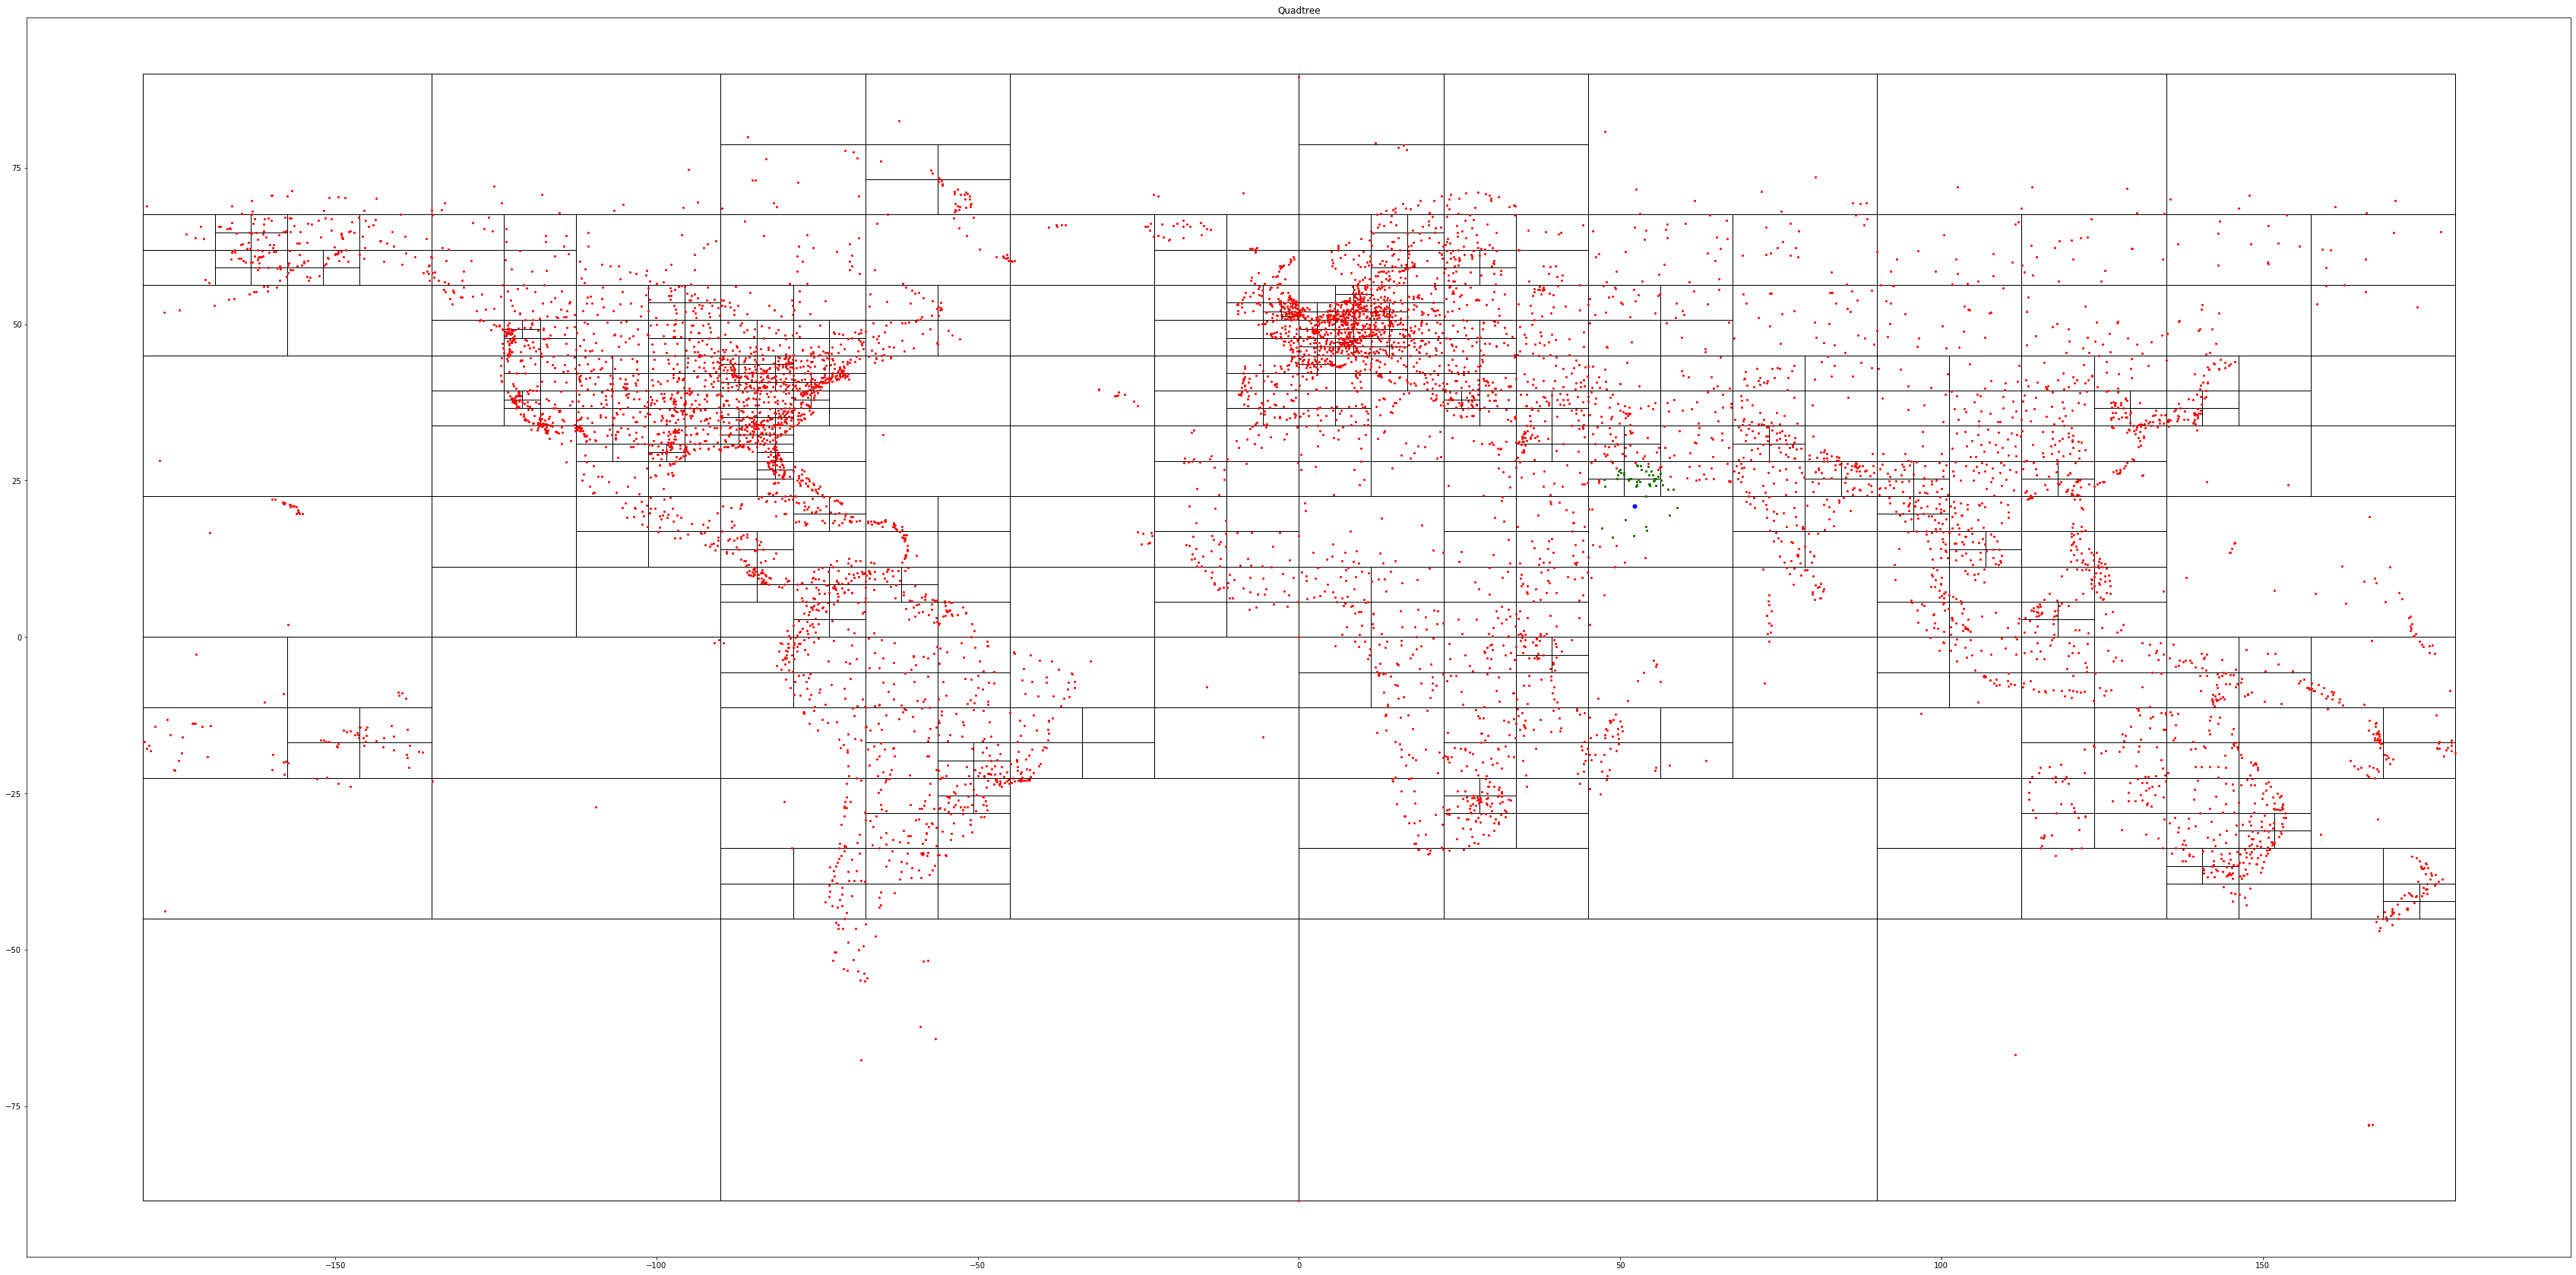

In [6]:
knn_time = timeit.default_timer()
result = tree.knn_search(52.26850128173828,20.910999298095703,50)
print("Nearest neighbors found in %s seconds. " % (timeit.default_timer() - knn_time))
tree.plot_knn(result,(52.26850128173828,20.910999298095703))

Tree updated in 0.14225480000000346 seconds. 


C:\Users\dimit\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


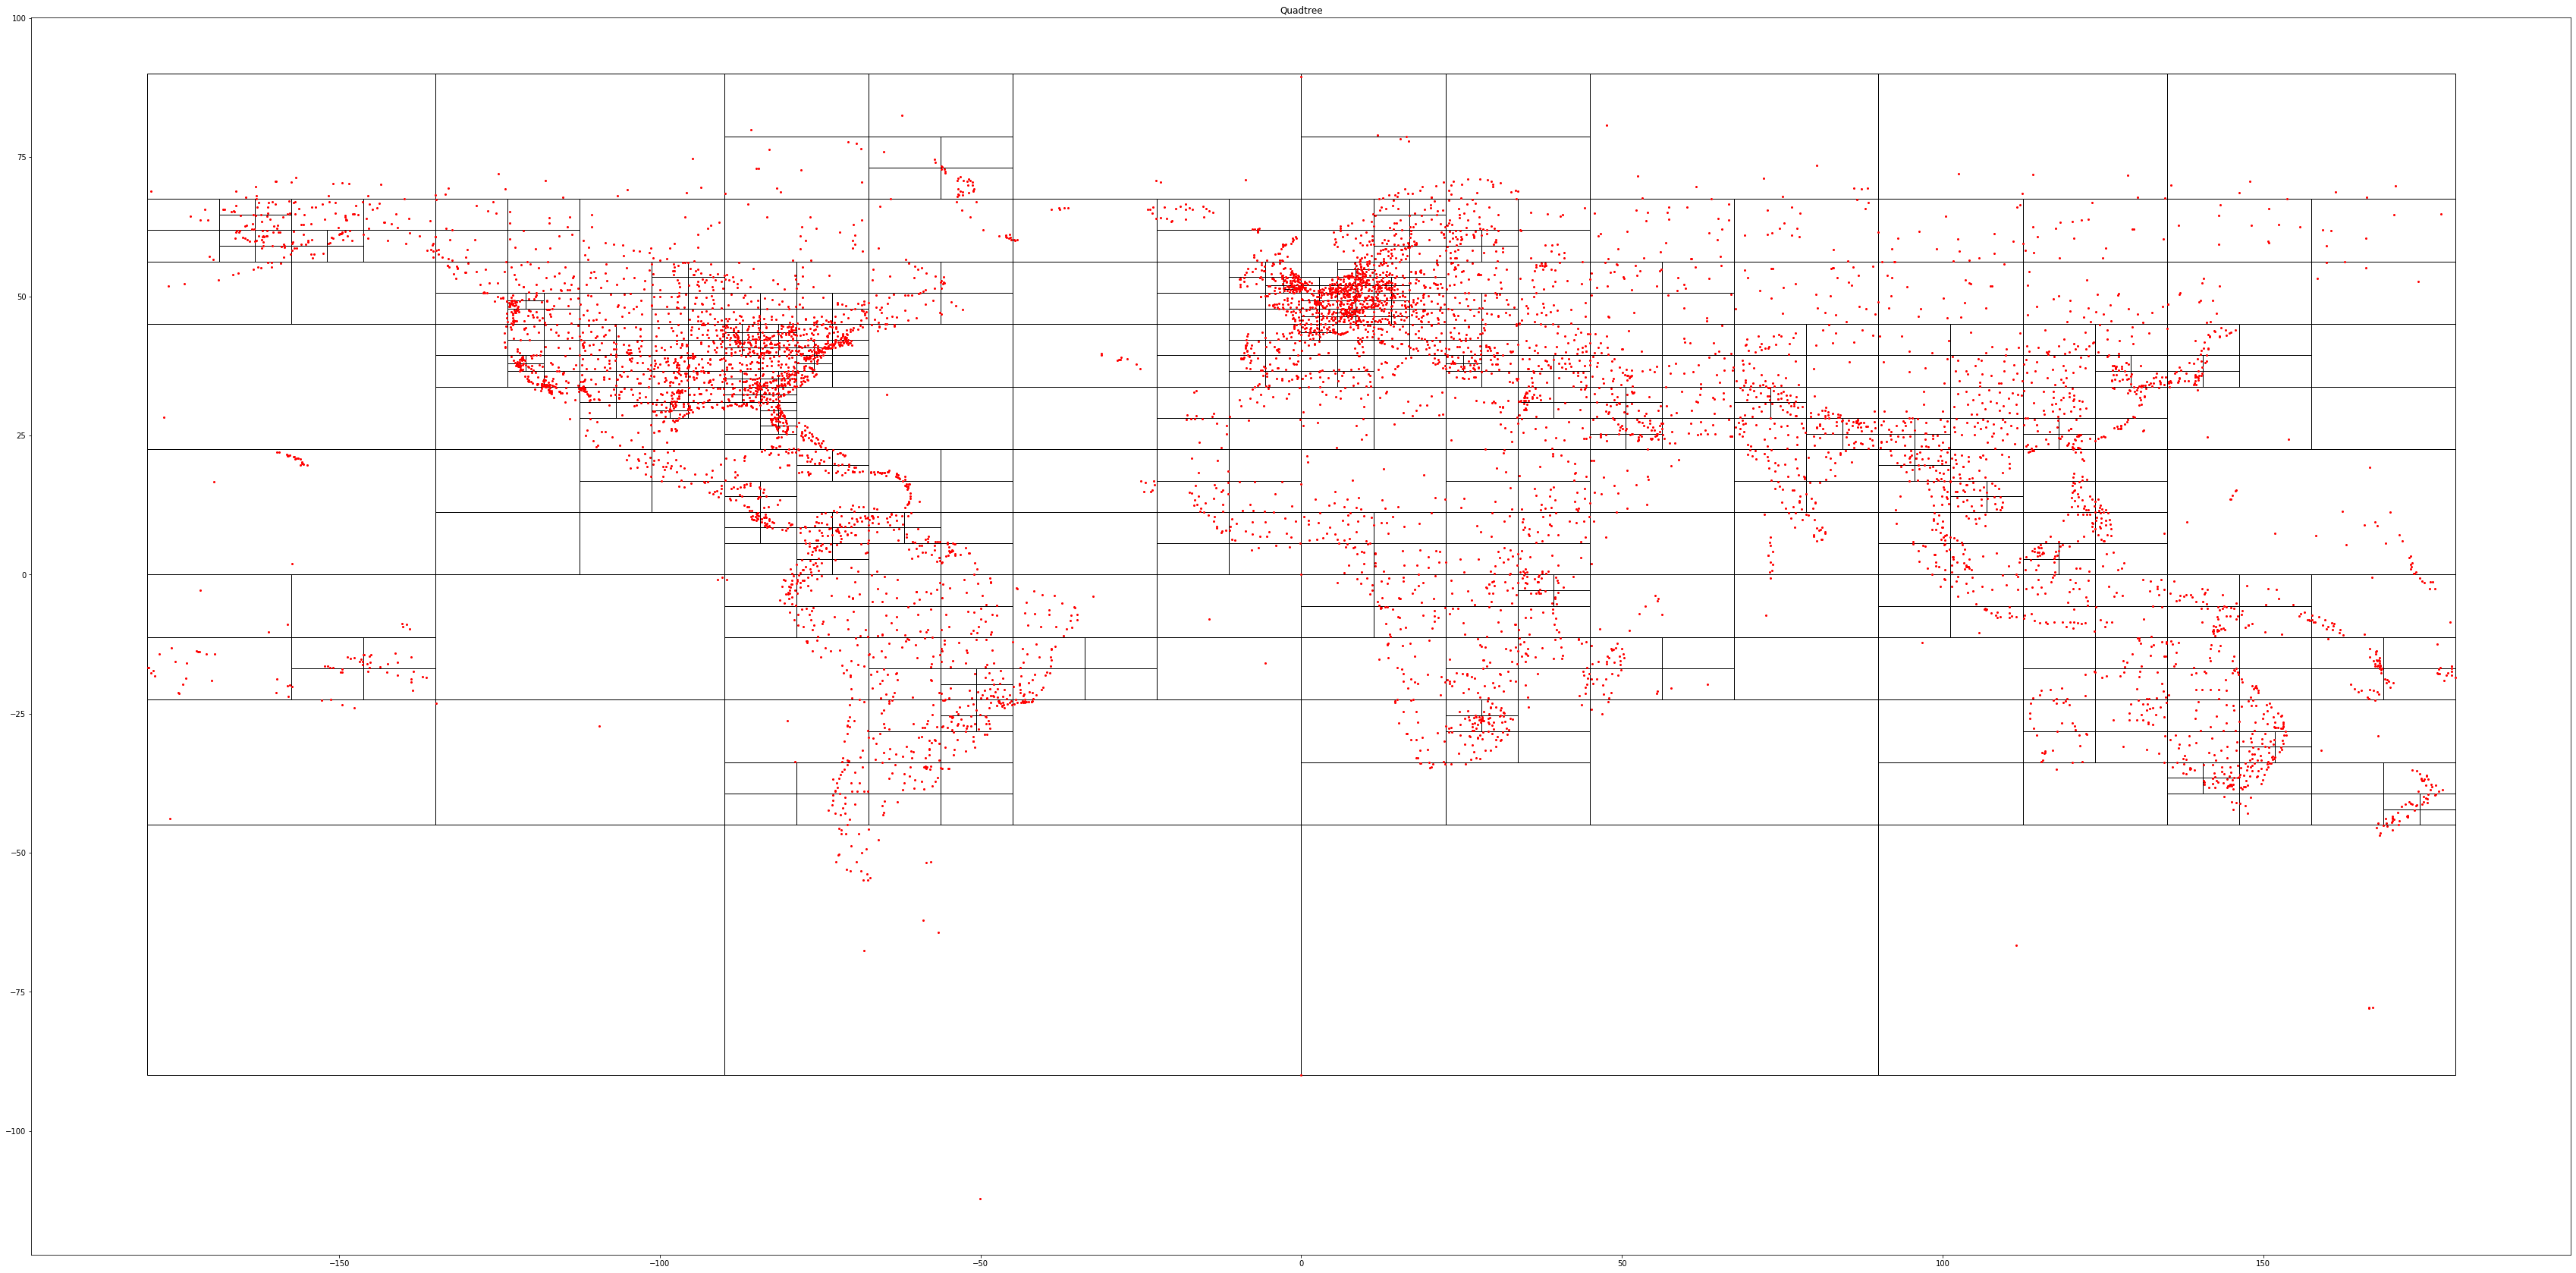

In [7]:
update_time = timeit.default_timer()
tree.update((-88.164854397615025,0.124379655037946),(-50.123456778101112,-112.112233445566778))  
print("Tree updated in %s seconds. " % (timeit.default_timer() - update_time))  
tree.plot_tree()

Nearest neighbors in range found in 0.029659199999997554 seconds. 


C:\Users\dimit\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


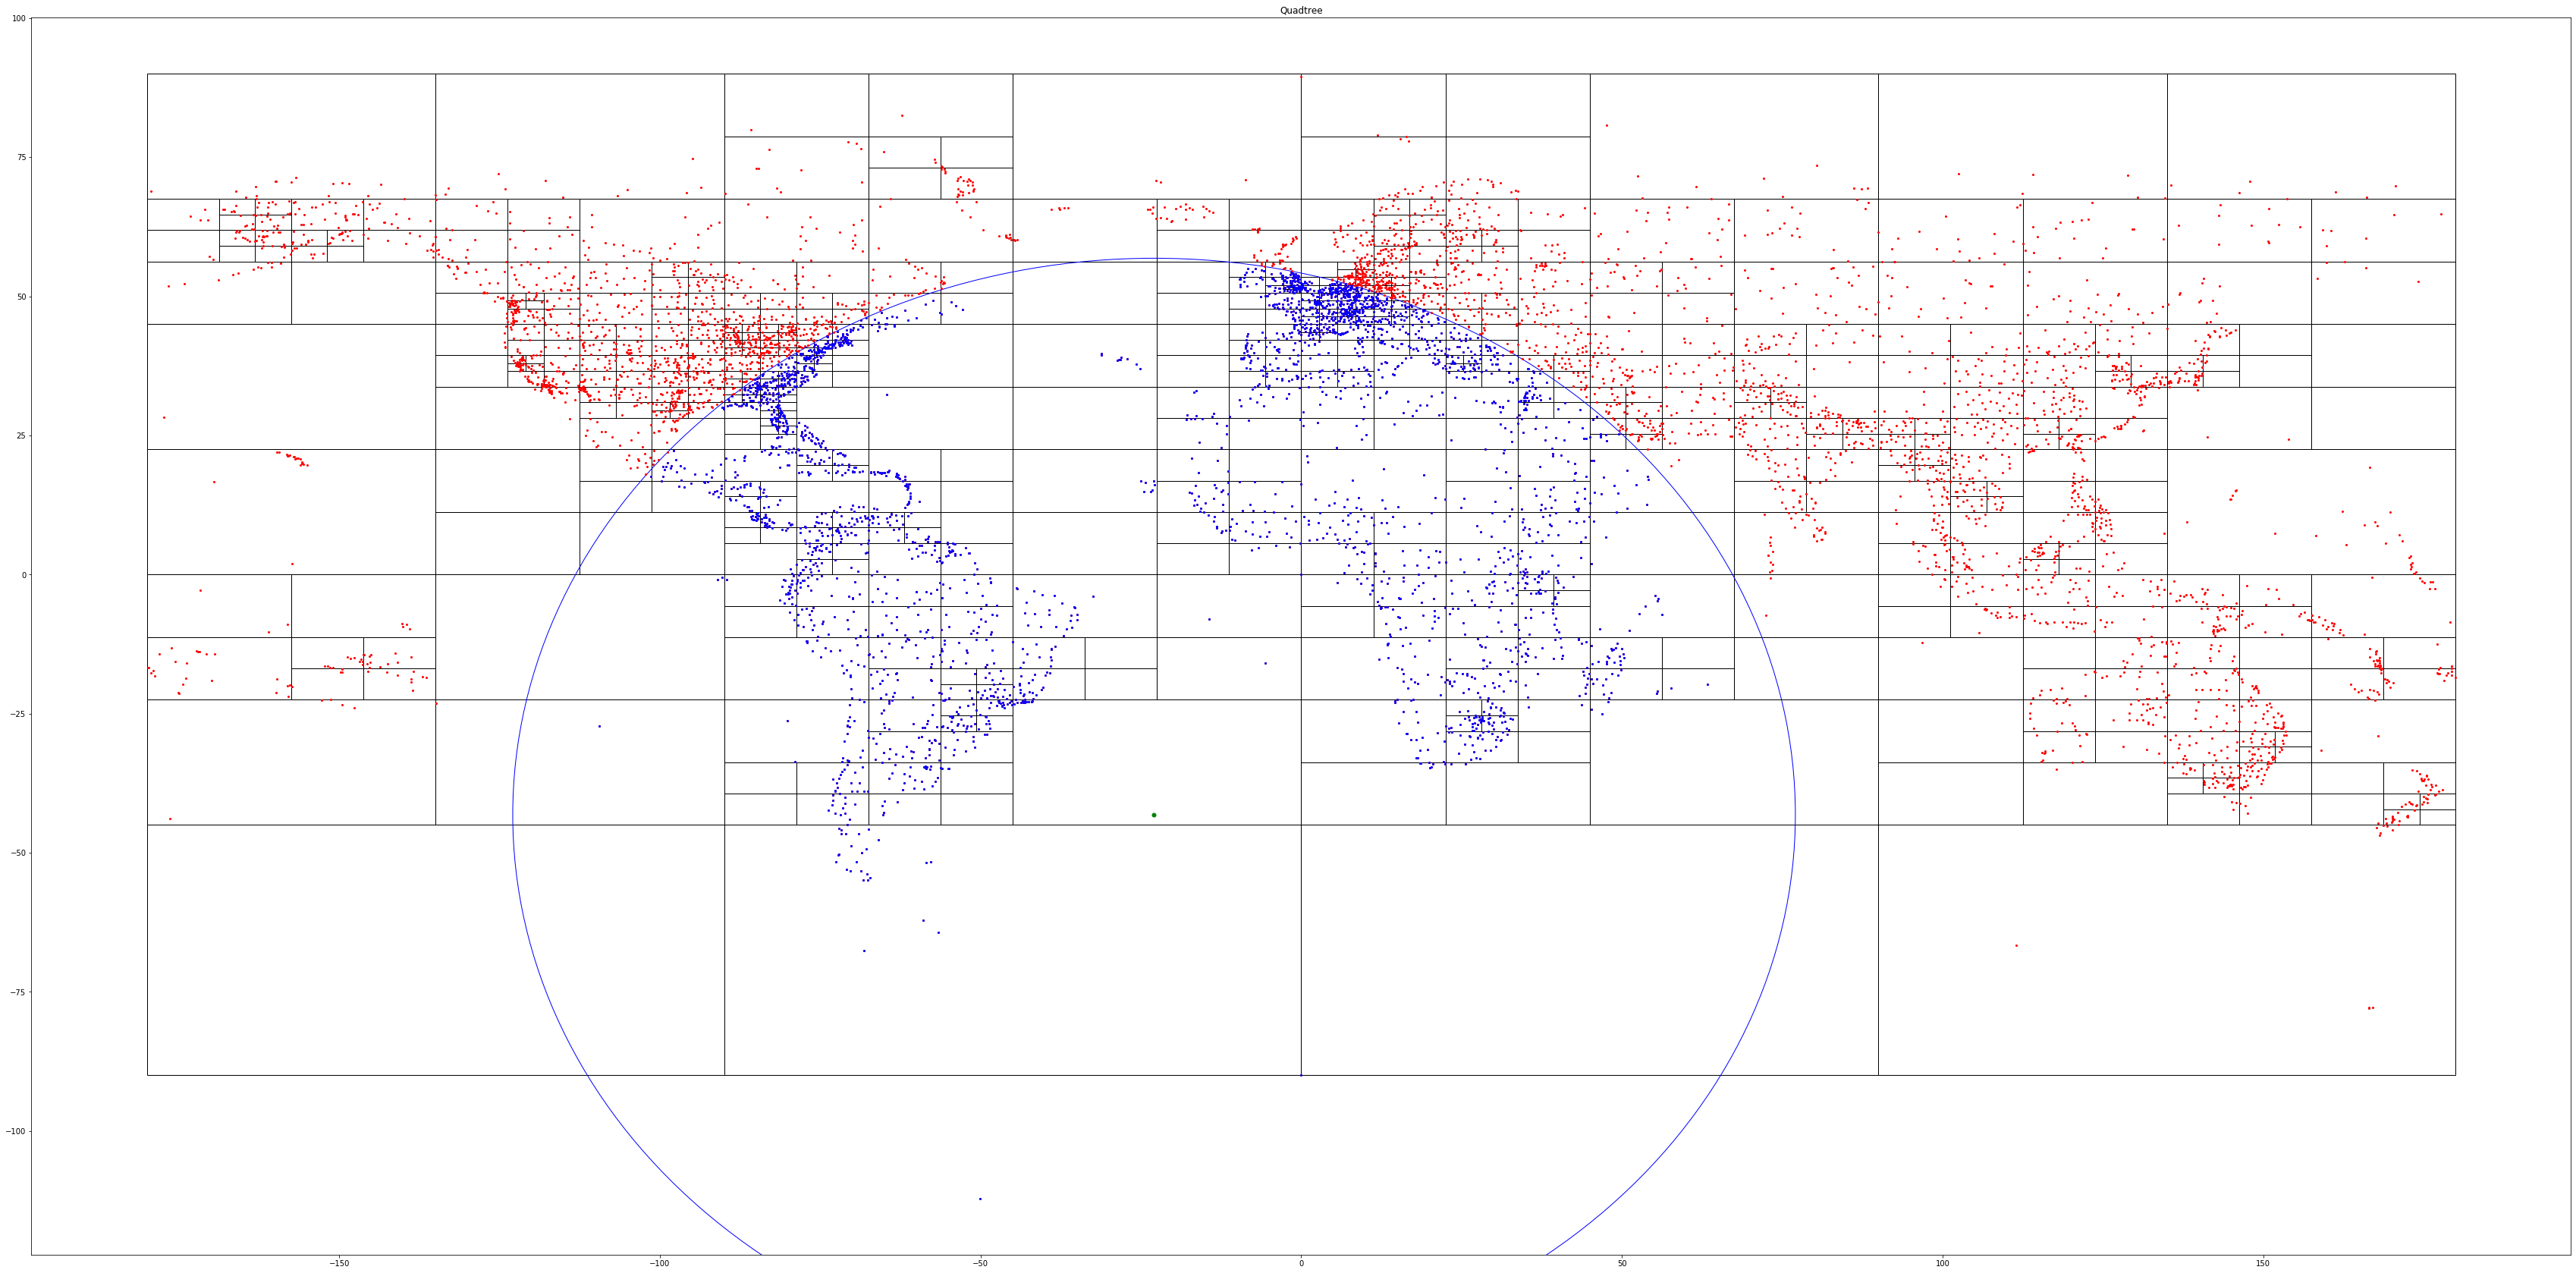

In [8]:
range_time = timeit.default_timer()
result = tree.range_search(-22.95166778564453,-43.16583251953125,100)
print("Nearest neighbors in range found in %s seconds. " % (timeit.default_timer() - range_time))
tree.plot_range_search(result,(-22.95166778564453,-43.16583251953125),100)

In [9]:
import sys

def get_size(obj, seen=None):
    size = sys.getsizeof(obj)
    if seen is None:
        seen = set()   #create empty set
    obj_id = id(obj)
    if obj_id in seen:
        return 0
    seen.add(obj_id)
    if isinstance(obj, dict):
        size += sum([get_size(v, seen) for v in obj.values()])
        size += sum([get_size(k, seen) for k in obj.keys()])
    elif hasattr(obj, '__dict__'):
        size += get_size(obj.__dict__, seen)
    elif hasattr(obj, '__iter__') and not isinstance(obj, (str, bytes, bytearray)):
        size += sum([get_size(i, seen) for i in obj])
    return size

size = get_size(tree)
print('Size of Quad-tree: ',size,' bytes.')


Size of Quad-tree:  2569530  bytes.
